### Project Outline
This project is to deeply understand dog-rating tweets posted on "We Rate Dogs", as a part of data wrangling project at Udacity. The datasets consist of three tables- Archived tweets, Image prediction, and JSON file which has been gathered via Twitter API.

The project process is as follow; Gathering data, Visual & Programmatic assessment, Data cleaning and Analysis.

### Gathering Data

In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import requests
import json
from timeit import default_timer as timer

In [2]:
twit_arc_raw = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
predict_raw = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twit_arc_raw.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
twit_json_raw = pd.read_json('tweet-json.txt', lines=True)

### Visual Assessment

In [6]:
twit_arc = twit_arc_raw.copy()

In [7]:
predict = predict_raw.copy()

In [8]:
twit_json = twit_json_raw.copy()

In [9]:
twit_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
twit_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Quality Issues:
#### twit_arc
- Remove duplicated part in "expanded_urls" column
- Remove rows with values in "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns
- Remove HTML tag from "source" column

#### predict
"P1", "P2", "P3" columns should start with upper case letter

#### twit_json
Remove HTML tag from "source" column

### Tidiness Issues:
#### twit_arc
Dog stage (doggo, floofer, pupper, puppo) must be merged into one column.

#### twit_json
Add the retweet_count and favorite_count columns to the twit_arc, since this data is meant to augment the archived tweet data.

#### predict
Add breed prediction column to twit_arc as it could give more information on which breed of dog has been posted most.

### Programmatic Assessment

In [12]:
# checking for duplicates 

twit_arc.duplicated().sum()

0

In [13]:
predict.duplicated().sum()

0

In [14]:
twit_json.id.duplicated().sum()

# due to list (display_text_range column) in twit_json, it was impossible to check duplicates in a whole. 
# so I have checked duplicates for id column instead.

0

In [15]:
# checking for datatype & missing values

twit_arc.info()

# we can also see that the number of non-null rows are the same as "retweeted_status_user_id", "retweeted_status_timestamp".
# we have to remove these rows, since our analysis doesn't have to include retweets.
# we can simply remove one of the three columns above.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# checking for wrong names

pd.set_option('display.max_rows', 30)
twit_arc.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Napolean      1
Striker       1
Danny         1
Andru         1
Vinnie        1
Name: name, Length: 957, dtype: int64

In [17]:
twit_arc.query("name in ['a', 'an', 'the', 'not', 'actually']").name.value_counts()

# there are many names which are clearly not real names. (e.g. a, the, an, not ....) 
# we will change those names into "None" in the later stage

a           55
the          8
an           7
not          2
actually     2
Name: name, dtype: int64

In [18]:
# checking for the wrong ratings
pd.set_option('display.max_colwidth', None)

twit_arc_check = twit_arc.query('rating_denominator != 10')
twit_arc_check = twit_arc_check[['text','rating_numerator', 'rating_denominator']]
twit_arc_check.head()

# Some rows have wrong rating denominator & rating numerator.
# They must be amended manually, based on what's written on "text" column.

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11


In [19]:
# checking for datatypes

predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# checking for datatypes

twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Summary
### Quality issues:
#### twit_arc
- Remove duplicated data in "expanded_urls" column & the rows with null value in the same column
- Remove rows that have values in "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns
- Change the datatype of "timestamp" column to datatime
- Get the right ratings in "rating nominator" & "rating denominator", and merge into one column
- Change the datatype of "tweed_id" columnb to str
- Remove HTML tag from "source" column
- Remove words that are not names in 'name' column

#### twit_json
- Remove HTML tag from "source" column
- Change the datatype of "tweed_id" columnb to str

#### predict
- "P1", "P2", "P3" columns should start with upper case letter
- Change the datatype of "tweed_id" columnb to str


### Tidiness Issues:
#### twit_arc
Dog stage (doggo, floofer, pupper, puppo) must be merged into one column.

#### twit_json
Add the retweet_count and favorite_count columns to the twit_arc, since this data is meant to augment the archived tweet data.

#### predict
Add breed prediction column to twit_arc as it could give more information on which breed of dog has been posted most.

## Cleaning

### Quality : twit_arc
####  1. Remove duplicated data & the rows with null value in "expanded_urls" column

#### Define
- Remove null values in expanded_urls with .dropna functions
- Split the value with .split function, and choose the first value

#### Code

In [21]:
twit_arc.dropna(subset = ['expanded_urls'], inplace = True)

def delete_duplicated_urls(url):
    true_url = url.split(',')[0]
    return true_url

twit_arc['correct_expanded_urls'] = twit_arc.apply(lambda x: delete_duplicated_urls(x['expanded_urls']), axis=1)
twit_arc.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [22]:
for index,row in twit_arc.iterrows():
    if len(row['correct_expanded_urls'].split(',')) > 1:
        print(row['correct_expanded_urls'])

#### 2. Remove non-empty rows in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#### Define
We will remove non-null rows in the columns above, which are not required for our analysis.
Since the three columns shares the same non-empty rows, we can just based on one of the columns.

#### Code

In [23]:
retweeted_status_id_index = twit_arc[twit_arc.retweeted_status_id.notnull()].index

twit_arc.drop(retweeted_status_id_index, axis = 0, inplace= True)

#### Test

In [24]:
twit_arc[twit_arc.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_expanded_urls


#### 3. Change datatype of timestamp column
#### Define
Change datatype from timestamp colum to datatime

#### Code


In [25]:
twit_arc.timestamp = twit_arc.timestamp.astype('datetime64')

#### Test

In [26]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2117 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2117 non-null   datetime64[ns]
 4   source                      2117 non-null   object        
 5   text                        2117 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   rating_numerator            2117 non-null   int64         
 10  rating_denominator          2117 non-null   int64         
 11  name                        2117 non-null   object      

#### 4. Amend ratings and combine into one
#### Define
Find the right rating_denominator and rating_nominator by selecting the rows with other denominators than 10.
Change the values after comparing with what's written on the text column.
Combine them into the complete ratings, by creating a new column.
#### Code

In [27]:
# We found out in the previous assessment that index 1068, 1165, 1662, 2335, 516 must be amended.

numbers = [1068, 1165, 1662, 2335, 516]

for n in numbers:
    print(twit_arc.query('rating_denominator != 10').loc[n, 'rating_numerator'],'/',twit_arc.query('rating_denominator != 10').loc[n, 'rating_denominator'])

9 / 11
4 / 20
7 / 11
1 / 2
24 / 7


In [28]:
# amending 5 rows

twit_arc['rating_numerator'].replace([9,4, 7, 1,24], [14,13,10, 9, 10], inplace = True)
twit_arc['rating_denominator'].replace([11,20, 11, 2,7], [10,10,10, 10, 10], inplace = True)

# The last column (index 516) doesn't have any ratings in the note, but I will change it to 10/10 for convenience in calculation

In [29]:
# combining into a single column
twit_arc['ratings'] = twit_arc['rating_numerator'].astype('str') + "/" +twit_arc['rating_denominator'].astype('str')

#### Test

In [30]:
numbers = [1068, 1165, 1662, 2335, 516]

for n in numbers:
    print(twit_arc.loc[n, 'ratings'])
    
# I will not drop the original ratings columns for now, since they might come in handy with calculating in future.

14/10
13/10
10/10
9/10
10/10


#### 5. Change the datatype to str
#### Define
Change the datatype of tweet_id, in_reply_to_status_id, in_reply_to_user_id to str

#### Code

In [31]:
ids_list = ['tweet_id', "in_reply_to_status_id", "in_reply_to_user_id"]

def string_convert(dataset, column):
    dataset[column] = dataset[column].astype('str')
    result = dataset[column]
    return result

for ids in ids_list:
    string_convert(twit_arc, ids)

#### Test

In [32]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2117 non-null   object        
 1   in_reply_to_status_id       2117 non-null   object        
 2   in_reply_to_user_id         2117 non-null   object        
 3   timestamp                   2117 non-null   datetime64[ns]
 4   source                      2117 non-null   object        
 5   text                        2117 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   rating_numerator            2117 non-null   int64         
 10  rating_denominator          2117 non-null   int64         
 11  name                        2117 non-null   object      

#### 6. Remove HTML tag from 'source'
#### Define
Only extract the source that is not HTML tag, using regular expression

#### Code

In [33]:
source = (twit_arc.source.str.extract('>(.*?)<').rename(columns={0: 'platform_name'}))
twit_arc['source'] = source

#### Test

In [34]:
twit_arc.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### 7. Remove words that are not names in 'name'
#### Define
There are names which are obviously not a name, which begins with lower case. Select the names which start with lower case, get their indexes and drop the rows

#### Code

In [35]:
mask = twit_arc.name.fillna("lower").str.islower()
column_name = 'name'
twit_arc.loc[mask, column_name] = np.nan
twit_arc.replace(np.nan, "None", inplace = True)

#### Test

In [36]:
twit_arc.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_expanded_urls,ratings


### Quality : twit_json

#### 1. Remove HTML tag from 'source'

#### Define
Only extract the real source that is not HTML tag, using regular expression

#### Code

In [37]:
source = (twit_json.source.str.extract('>(.*?)<').rename(columns={0: 'platform_name'}))
twit_json['source'] = source

#### Test

In [38]:
twit_json.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 2. Change the datatype to str & remove unncessary columns
#### Define
Change the datatype of id, in_reply_to_status_id, in_reply_to_user_id, quoted_status_id to str
Remove "in_reply_to_status_id_str", "in_reply_to_user_id_str", "quoted_status_id_str" columns
#### Code

In [39]:
ids_list = ['id', "in_reply_to_status_id", "in_reply_to_user_id", "quoted_status_id"]

for ids in ids_list:
    string_convert(twit_json, ids)
    
twit_json.drop(["in_reply_to_status_id_str", "in_reply_to_user_id_str", "quoted_status_id_str"], axis = 1, inplace = True)

#### info

In [40]:
twit_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          2354 non-null   object             
 10  in_reply_to_user_id     

### Quality : predict
#### P1, P2, P3 columns should start with upper case letter
#### Define
Dog names in P1, P2, P3 must start with upper case letter for future analysis. I will change the first letter using .capitalize() function.

#### Code

In [41]:
columns_list = ['p1', 'p2', 'p3']

for columns in columns_list:
    predict[columns] = predict[columns].str.capitalize()

#### Test

In [42]:
predict.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,Basset,0.103842,True,Brittany_spaniel,0.062414,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,Wool,0.525434,False,Fur_coat,0.236391,False,Kuvasz,0.038243,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,Basenji,0.005798,True


In [43]:
# change the datatype of tweet_id to str
string_convert(predict, 'tweet_id')

predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness : twit_arc
#### Dog stage (doggo, floofer, pupper, puppo) must be merged into one column.
#### Define
- Replace None or N/A values to blank, so that we can smoothly combine into one column, "dog_stage". Some columns that contain multiple values (e.g. doggo, pupper) will be amended using df.loc.
- Original Doggo, Floofer, Pupper, Puppo columns will be dropped in the last step.

#### Code

In [44]:
twit_arc.doggo.replace('None', '', inplace=True)
twit_arc.doggo.replace(np.NaN, '', inplace=True)
twit_arc.floofer.replace('None', '', inplace=True)
twit_arc.floofer.replace(np.NaN, '', inplace=True)
twit_arc.pupper.replace('None', '', inplace=True)
twit_arc.pupper.replace(np.NaN, '', inplace=True)
twit_arc.puppo.replace('None', '', inplace=True)
twit_arc.puppo.replace(np.NaN, '', inplace=True)

In [45]:
twit_arc['dog_stage'] = twit_arc.doggo + twit_arc.floofer + twit_arc.pupper + twit_arc.puppo
twit_arc.loc[twit_arc.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twit_arc.loc[twit_arc.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twit_arc.loc[twit_arc.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
twit_arc.dog_stage.replace('', "None", inplace = True)

twit_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [46]:
twit_arc.dog_stage.value_counts()

None             1779
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### Tidiness : twit_json
#### Add the retweet_count and favorite_count columns to the twit_arc dataset
#### Define
Change the column name "id" in twit_json dataset to "tweet_id" and merge into twit_arc dataset

#### Code

In [47]:
twit_json.rename(columns = {'id': 'tweet_id'}, inplace = True)
id_retweet = twit_json[['tweet_id','retweet_count', 'favorite_count']]
twit_arc = pd.merge(twit_arc, id_retweet, on = ['tweet_id'])

#### Test

In [48]:
twit_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2117 non-null   object        
 1   in_reply_to_status_id       2117 non-null   object        
 2   in_reply_to_user_id         2117 non-null   object        
 3   timestamp                   2117 non-null   datetime64[ns]
 4   source                      2117 non-null   object        
 5   text                        2117 non-null   object        
 6   retweeted_status_id         2117 non-null   object        
 7   retweeted_status_user_id    2117 non-null   object        
 8   retweeted_status_timestamp  2117 non-null   object        
 9   rating_numerator            2117 non-null   int64         
 10  rating_denominator          2117 non-null   int64         
 11  name                        2117 non-null   object      

### Tidiness : predict
Extract the correct prediction from predict dataset and add a breed prediction column to twit_arc
#### Define
- Get accurate predict results from p1, p2, p3 columns using for loop in each row.
- Add the column to twit_arc dataset

#### Code

In [49]:
dog_predict = []

for i in range(len(predict)):
    if predict['p1_dog'][i] == True:
        dog_predict.append(predict['p1'][i])
    elif predict['p2_dog'][i] == True:
        dog_predict.append(predict['p2'][i])
    elif predict['p3_dog'][i] == True:
        dog_predict.append(predict['p3'][i])
    else: 
        dog_predict.append("No correct prediction")

In [50]:
predict['dog_predict'] = dog_predict
predict_copy = predict[['tweet_id', 'dog_predict']]
twit_arc = pd.merge(twit_arc, predict_copy, on = ['tweet_id'], how= 'left')

#### Test

In [51]:
twit_arc.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,correct_expanded_urls,ratings,dog_stage,retweet_count,favorite_count,dog_predict
1090,707411934438625280,nan,nan,2016-03-09 03:45:22,Twitter for iPhone,"""I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius."" Both 11/10 https://t.co/uQsCJ8pf51",None,None,None,11,10,None,https://twitter.com/dog_rates/status/707411934438625280/photo/1,11/10,pupper,673,2486,Lakeland_terrier
1031,711743778164514816,nan,nan,2016-03-21 02:38:34,Twitter for iPhone,Meet Roosevelt. He's calculating the best case scenario if he drops out instead of doing math hw. 11/10 relatable af https://t.co/QcSIRDpfVg,None,None,None,11,10,Roosevelt,https://twitter.com/dog_rates/status/711743778164514816/photo/1,11/10,None,1101,3095,Lakeland_terrier
1101,706681918348251136,nan,nan,2016-03-07 03:24:33,Twitter for iPhone,Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv,None,None,None,12,10,Katie,https://twitter.com/dog_rates/status/706681918348251136/photo/1,12/10,None,1103,3627,Toy_poodle


## Analysis

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

### Q1. What are the 10 most popular breed?

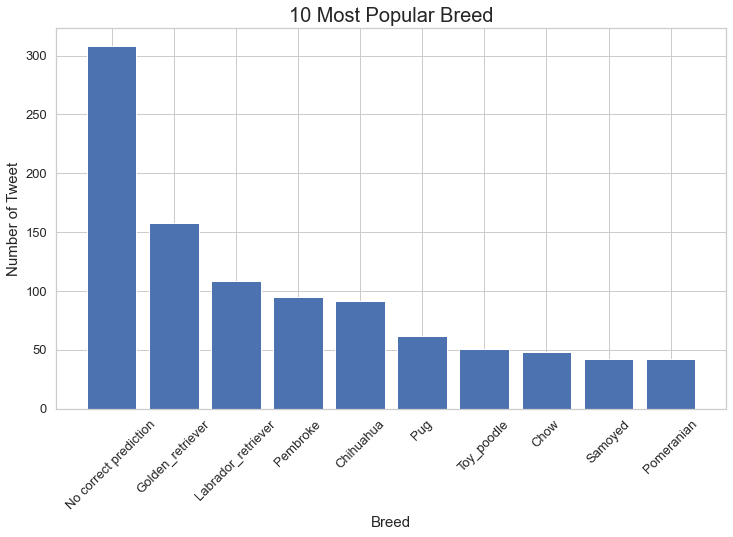

In [55]:
popular_dog = twit_arc.dog_predict.value_counts()[:10]
plt.figure(figsize = (12,7))
plt.bar(x = popular_dog.index, height= popular_dog)
plt.title("10 Most Popular Breed", size = 20)
plt.ylabel("Number of Tweet", size = 15)
plt.xlabel("Breed", size = 15)
plt.xticks(rotation= 45, size = 13)
plt.yticks(size = 13);

Based on the number of dog breed that has been posted, we have made a bar chart of the breeds from top 1 to 10. Even though there were more than 300+ images that were not properly predicted, we have still found out that Golden Retriever is the most popular breed on the "We Rate Dog" account.

### Q2. What are the 10 most common name?

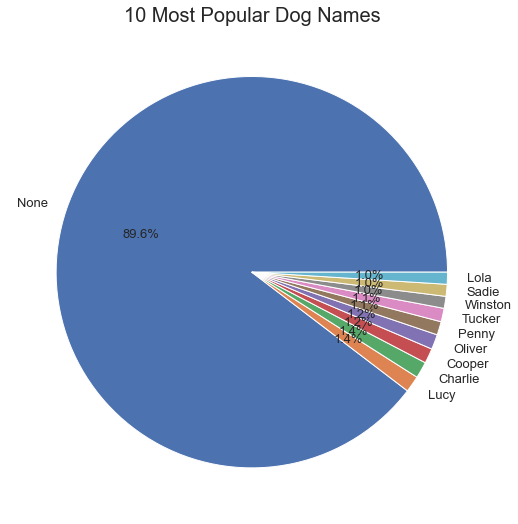

In [57]:
popular_name = twit_arc.name.value_counts()[:10]
plt.figure(figsize = (9,9))
plt.title("10 Most Popular Dog Names", size = 20)
plt.pie(popular_name, labels = popular_name.index, autopct='%1.1f%%', textprops={'fontsize': 13});

Just like the most popular breed, most of the data (88.1%) were not properly recorded. We do know that Lucy and Charlie are the most popular names for female & male dogs. The rest of the names had very small difference though - name in 10th place (Lola) is only 0.5% away from the winners. Moreover there are multiple names that took the same place. Therefore we know that 9 most common dog names have similar popularity.

### Q3. What are the 10 most frequent rating?

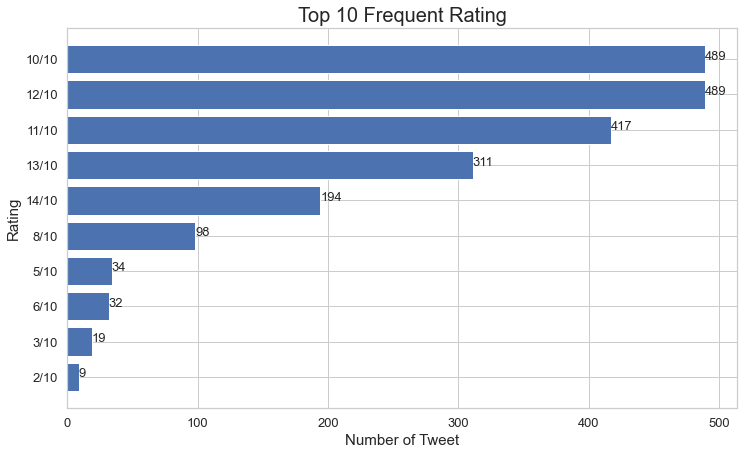

In [58]:
frequent_rating = twit_arc.ratings.value_counts()[:10]
plt.figure(figsize = (12,7))
plt.barh(y = frequent_rating.index, width= frequent_rating)
plt.title("Top 10 Frequent Rating", size = 20)
plt.ylabel("Rating", size = 15)
plt.xlabel("Number of Tweet", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.gca().invert_yaxis()

for index, value in enumerate(frequent_rating):
    plt.text(value, index, str(value), size = 13);

Just as WeRateDog is famous for the unique the rating system that numerator is bigger than denominator, we can see that the most popular rating is 12/10. Most of ratings (91.43%) had bigger denominators than numerator. What's interesting is that 10/10, the very "normal" rating, is in the 2nd place as well. It's easy to find that WeRateDogs tend to give generous ratings to most of the dogs they post.